Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

### Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

### Задание

1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. <span style="color:gray">С использованием t-test статистики проверить взаимосвязи между несколькими переменными.</span>
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете</span>

Для зачета по дипмломной работе необходимо выполнить не менее 70% заданий от общего количества, т.е 8 заданий.*

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

### 1. Загрузить файл hr.csv.

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [5]:
main_stat = pd.DataFrame()

columns = list(df)

for col in columns:
    try:
        median_ = df[col].median()
    except:
        median_ = 'NaN'
    try:
        mode_ = df[col].mode()[0]
    except:
        mode_ = 'NaN'
    main_stat[col] = [median_, mode_]

main_stat.rename(index = {0: 'median', 1: 'mode'}, inplace = True)

main_stat = pd.concat([df.describe().drop(index=['count', '25%', '50%', '75%']), main_stat])
main_stat

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low


### Выводы по основным показателям:

1. **satisfaction_level (*Уровень удовлетворенности работой*)** - минимальный уровень удовлетворенности работой 0.09 (т.е. чуть выше чем полный 0), максимальный - 1 (т.е. кто-то всем доволен). Среднее арифметическое равно 0.612834 при стандартном отклонении вокруг ср.арифметического 0.248631 (т.е. разброс не огромный, но значимы) - можно сделать вывод, что по большей части удовлетворенность выше среднего. Это же подтверждает значение медианы равное 0.640000, которое делит выборку ровно пополам. Значение моды (мода - самое частое значение в выборке) в данном случае показательнее округлить до десятых (чтоб было больше одинаковых между собой значений). Значение округленной моды `df['satisfaction_level'].round(1).mode()[0]` равно 0.8, т.е.чаще всего работники ставят оценку удовлетворенности выше среднего.


2. **last_evaluation (*Время с момента последней оценки в годах*)** - самые "старые" (максимум) данные возрастом в 1 год, самые "ранние" (минимум) 0.36 месяца. По средним значениям (медиана, ср.арифм., и округленная мода `df['last_evaluation'].round(1).mode()[0]`=0.6) можно сделать вывод, что большая часть данных имеет возраст чуть более полугода. 


3. **number_projects (*Количество проектов, выполненных за время работы*)** - варьиуруется от 2 до 7, т.е. каждый работник поработал хотя на на 2 проектах. Большинство сотрудников успело поработать над 4 проектами.


4. **average_montly_hours (*Среднее количество часов на рабочем месте в месяц*)** - варьируется от 96 до 310, при этом всреднем сотрудники нарабатывают около 200 часов с месяц.


5. **time_spend_company (*Стаж работы в компании в годах*)** - сотрудники работают в компании от 2 до 10 лет


6. **Work_accident (*Происходили ли несчастные случаи на рабочем месте с сотрудником*)** - данный показатель категорийный (1 - да, 2 - нет), поэтому имеет смысл смотреть только на моду равную 0. Это означает у с большинством сотрудников несчастных случаев не было.  


7. **left(*Уволился ли сотрудник*)** - данный показатель категорийный (1 - да, 2 - нет), поэтому имеет смысл смотреть только на моду равную 0, т.е. большинство сотрудников не уволились.


8. **promotion_last_5years(*Повышался ли сотрудник за последние пять лет*)** - данный показатель категорийный (1 - да, 2 - нет), поэтому имеет смысл смотреть только на моду равную 0, т.е. большинство сотрудников не были повышены за последние 5 лет.


9. **department(*Отдел в котором работает сотрудник*)** - данный показатель категорийный, поэтому имеет смысл смотреть только на моду равную sales, т.е. большинство сотрудников из отдела продаж. Вероятно компания что-то продает, т.е. продажник - это тот, кто непосредственно работает с клиентом. Понятно, что все компании так или иначе что-то продают. Но, например, в компании по разработке софта большинство сотрудников - это, так или иначе, разработчики. А в сети М.Видео - больше всего продажников.


10. **salary(*Относительный уровень зарплаты*)** - данный показатель категорийный, поэтому имеет смысл смотреть только на моду равную low, т.е. большинство сотрудников имеют низкую оплату.





### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

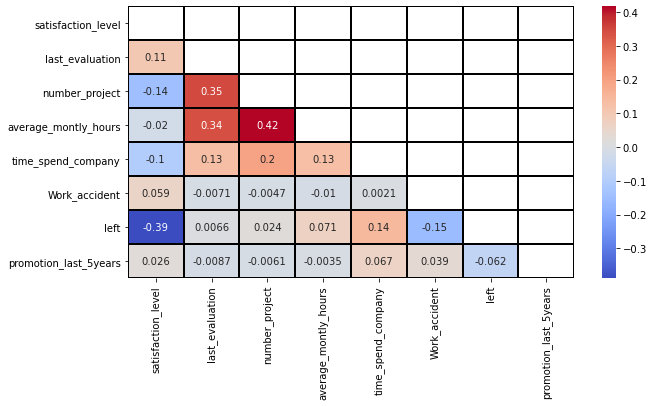

In [281]:
# Используем метод Кендела, поскольку некоторые переменные (например, number_project) являются НЕ нерерывными (ранговыми).
matrix = np.triu(df.corr(method='kendall'))
sns.heatmap(df.corr(), annot=True, mask=matrix, cmap='coolwarm', linewidths=1, linecolor='black')

### 4. Визуализировать несколько взаимосвязей между переменными.

Text(0, 0.5, 'Department')

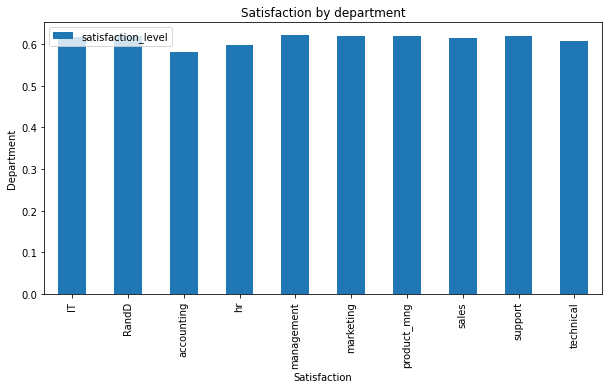

In [214]:
rcParams['figure.figsize'] = 10,5

ax = df[['satisfaction_level', 'department']].groupby(['department']).mean().plot(kind='bar', 
                                                                             title='Satisfaction by department')

ax.set_xlabel('Satisfaction')
ax.set_ylabel('Department')

### Вывод: 

Среднмй уровень удовлетворенности вовсех отделах приблизительно одинаковый.

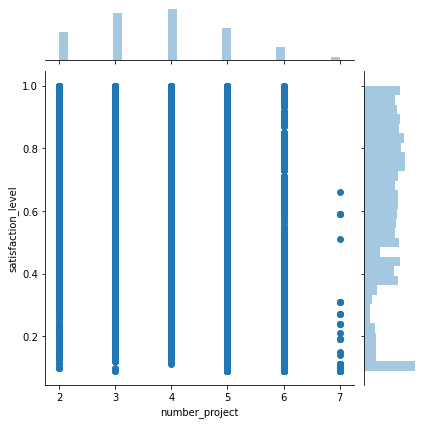

In [221]:
sns.jointplot(x='number_project', y='satisfaction_level', data=df, kind='scatter')

### Вывод: 

Сотрудники, которые выполнили максимальное количество проектов показывают чаще ниже среднего уровень удовлетворенности и не показывают высокую удовлетворенность.

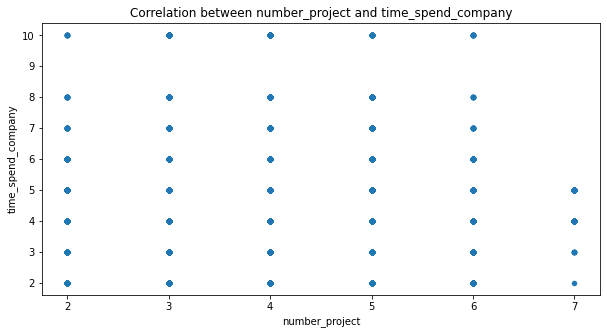

In [224]:
df.plot(kind='scatter', 
        x='number_project', 
        y='time_spend_company', 
        title='Correlation between number_project and time_spend_company')

### Вывод: 

1. Нет сотрудников, с 9 летним стажем.


2. Среди сотрудников, которые выполнили максимальное количество проектов нет тех, кто проработал более 5 лет. Возможно сотрудники, после 5 лет переходят на другие должности, где количество проектов меньше, но они более значимые и сложные. Либо сторудники после 5 лет работы на большом количестве проектов уходят.

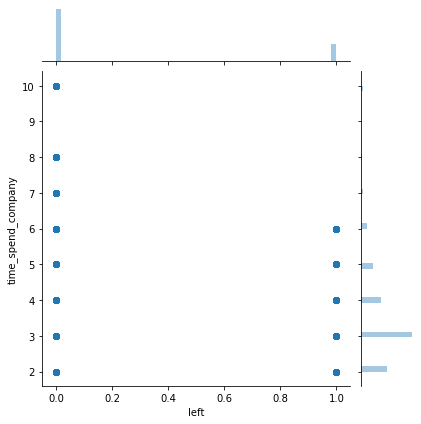

In [222]:
sns.jointplot(x='left', y='time_spend_company', data=df, kind='scatter')

### Вывод:

Среди сотрудников со стажем более 6 лет нет уволенных.

Text(0, 0.5, 'Department')

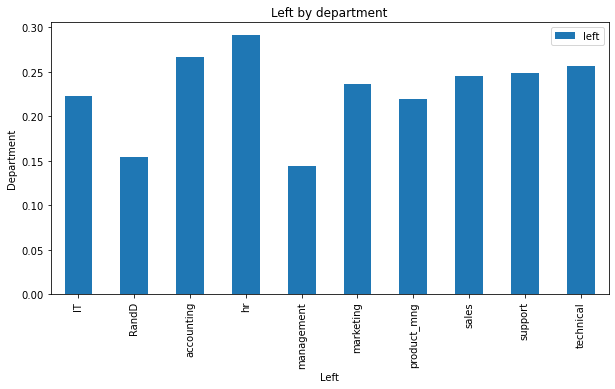

In [235]:
ax = df[['left', 'department']].groupby(['department']).mean().plot(kind='bar', title='Left by department')
ax.set_xlabel('Left')
ax.set_ylabel('Department')

### Вывод:

В среднем увольнений больше среди сотрудников отдела hr. Среди сотрудников отделов RandD и Mangment уволнений меньше всего.

### 6. Рассчитать сколько работников работает в каждом департаменте.

In [22]:
department = pd.DataFrame(data=df['department'].value_counts().index, columns=['department'])
count = pd.DataFrame(data=df['department'].value_counts().values, columns=['count'])
pd.merge(department, count, left_index=True, right_index=True)

,department,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


### 7. Показать распределение сотрудников по зарплатам.

Text(0, 0.5, 'Count of employees')

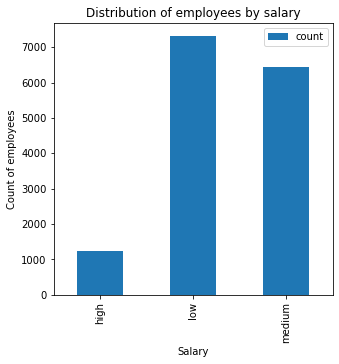

In [152]:
rcParams['figure.figsize'] = 5,5

salary = df[['salary', 'department']].groupby(['salary']).count()
salary.rename(columns={'department': 'count'}, inplace=True)

ax = salary.plot(kind='bar', title='Distribution of employees by salary')

ax.set_xlabel('Salary')
ax.set_ylabel('Count of employees')

### Вывод:

Подавляющее большинство сотрудников имеет низкий и средний уровень оплаты. Но чаще встречается низкий уровень оплаты. Что вполне нормально, поскольку высокий уровень оплаты, скорее всего, у руководителей, количество которых сравнительно невелико.

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

Text(0, 0.5, 'Count of employees')

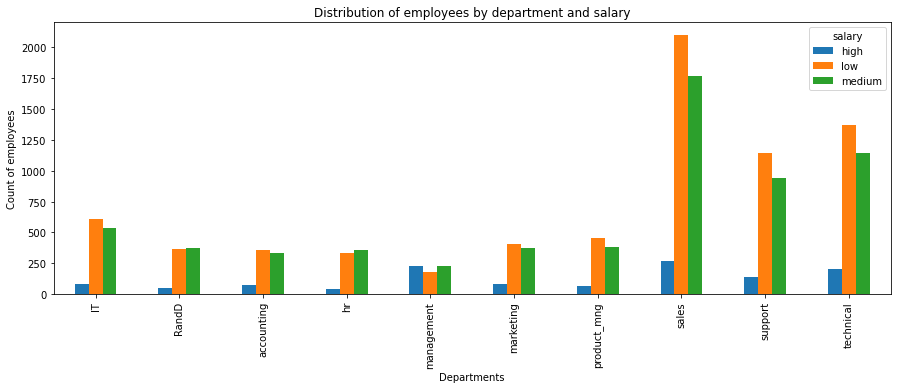

In [151]:
rcParams['figure.figsize'] = 15,5

salary_by_department = df[['salary', 'department', 'left']].groupby(['department', 'salary']).count().reset_index()

salary_by_department = salary_by_department.pivot_table(index='department', columns='salary', values='left')

ax = salary_by_department.plot(kind='bar', 
                          title='Distribution of employees by department and salary')

ax.set_xlabel('Departments')
ax.set_ylabel('Count of employees')

### Вывод:

Самые высокие зарплаты у сотрудников из отделов management и sales. При этом количество сотрудников с высокой оплатой в отделе sales не велико, подавляющее большинство сотрудников данного отдела имеют средний и низкий уровень оплаты. Видимо уровень оплаты зависит от принесенной компании прибыли и некоторые сотрудники умеют продавать значительно лучше большинства. Большинство сотрудников отдела продаж имеют низкую оплату.


Количество высокооплачиваемых сотрудников из отдела management состовляет приблизительно 1/3 от общего числа сотрудников отдела. Вероятно это управляющие верхнего уровня.


Также довольно много высокооплачиваемых сотрудников в отделе technical. При этом их количество от общего числа сотрудников данного отдела низкое. Возможно это тоже руководители отдела и технические специалисты выского уровня.

### 9. Сколько сотрудников покинули компанию.

In [99]:
count = df.left.value_counts().loc[df.left.value_counts().index==1]
print(f'Количество уволенных сотрудников = {int(count.values)}')

Количество уволенных сотрудников = 3571


### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [340]:
from scipy import stats as st

#### Гипотеза 1: Уволенные сотрудники не удовлетворены работой в компании.

Сформулируем нулевую и альтернативную гипотезы:

    H0: средняя удовлетворенность уволенных сотрудников работой в компании = 0.75
    H1: средняя удовлетворенность уволенных сотрудников работой в компании составляет менее 0.75
    
Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.

Будем проводить одновыборочный тест, поскольку анализируем одну выборку и значение по выборке будет сравниваться с константой.

Будем проводить односторонний тест, нас интересует отклонение среднего значения удовлетворенности сотрудников работой в компании только в одну сторону. Т.е., если среднее значение удовлетворенности сотрудников работой в компании составляет менее 0.75, то нулевая гипотеза опровергается, что подтверждает гипотезу - сотрудники не удовлетворены работой в компании.

In [339]:
# Отберем из исходных данных информацию только об уровне удовлетворенности уволившихся сотрудниках и поместим в df_
df_ = df.loc[df.left == 1][['satisfaction_level', 'left']]

alpha = 0.05
result = st.ttest_1samp(df_['satisfaction_level'], 0.75)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу. Средняя удовлетворенность уволенных сотрудников работой в компании меньше 0,75')
else:
    print('Не отвергаем нулевую нулевую гипотезу. Уволенные сотрудники были удовлетворены работой в компании')

Ttest_1sampResult(statistic=-70.16570217301656, pvalue=0.0)
Отвергаем нулевую гипотезу. Средняя удовлетворенность уволенных сотрудников работой в компании меньше 0,75


#### Гипотеза 2: Уволенные сотрудники не получали повышения за последние 5 лет.

Сформулируем нулевую и альтернативную гипотезы:

    H0: средняя повышаемость среди уволенных сотрудников за последние 5 лет = 0.5 (т.е. половина уволенных сотрудников за последние 5 лет получала повышение)
    H1: средняя повышаемость среди уволенных сотрудников за последние 5 лет менее 0.5
    
Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.

Будем проводить одновыборочный тест, поскольку анализируем одну выборку и значение по выборке будет сравниваться с константой.

Будем проводить односторонний тест, нас интересует отклонение среднего значения повышаемости сотрудников только в одну сторону. Т.е., если среднее значение повышаемости сотрудников составляет менее 0.5, то нулевая гипотеза опровергается, что подтверждает гипотезу - уволенные сотрудники не получали повышения за последние 5 лет.

In [341]:
# Отберем из исходных данных информацию только о повышении за последние 5 лет уволившихся сотрудниках и поместим в df_
df_ = df.loc[df.left == 1][['promotion_last_5years', 'left']]

alpha = 0.05
result = st.ttest_1samp(df_['promotion_last_5years'], 0.5)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу. Средняя повышаемость среди уволенных сотрудников за последние 5 лет менее 0.5')
else:
    print('Не отвергаем нулевую нулевую гипотезу. Половина из уволенных сотрудников за последние 5 лет получала поавшение')

Ttest_1sampResult(statistic=-406.28844481074714, pvalue=0.0)
Отвергаем нулевую гипотезу. Средняя повышаемость среди уволенных сотрудников за последние 5 лет менее 0.5


#### Гипотеза 3: Уволенные сотрудники имели низкий уровень оплаты.

Сформулируем нулевую и альтернативную гипотезы:

    H0: средний коэффициент оплаты среди уволенных сотрудников = 0.5
    H1: средняя коэффициент оплаты среди уволенных сотрудников менее 0.5
    
Поскольку в данном тесте цена ошибки не велика, зададим пороговый уровень статистической значимости alpha = 0.05.

Будем проводить одновыборочный тест, поскольку анализируем одну выборку и значение по выборке будет сравниваться с константой.

Будем проводить односторонний тест, нас интересует отклонение среднего значения коэффициента оплаты среди уволенных сотрудников только в одну сторону. Т.е., если среднее значение коэффициента оплаты составляет менее 0.5, то нулевая гипотеза опровергается, что подтверждает гипотезу - уволенные сотрудники имели низкий уровень оплаты.

In [354]:
def salary_koeff (param):
    if param == 'high':
        return 1
    if param == 'medium':
        return 0.5
    if param == 'low':
        return 0.25
    
# Отберем из исходных данных информацию только о уровне оплаты уволившихся сотрудниках и поместим в df_
df_ = df.loc[df.left == 1][['salary', 'left']]

# Добавим в df_ столбец salary_koeff с числовым коэффициентом уровня оплаты
df_['salary_koeff'] = df_['salary'].apply(salary_koeff)
df_.head()

,salary,left,salary_koeff
0,low,1,0.25
1,medium,1,0.50
2,medium,1,0.50
3,low,1,0.25
4,low,1,0.25


In [355]:
alpha = 0.05
result = st.ttest_1samp(df_['salary_koeff'], 0.5)
print(result)

if (result.statistic < 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу. Коэффициент оплаты среди уволенных сотрудников менее 0.5')
else:
    print('Не отвергаем нулевую нулевую гипотезу. Коэффициент оплаты среди уволенных сотрудников >= 0.5')

Ttest_1sampResult(statistic=-54.22532053877032, pvalue=0.0)
Отвергаем нулевую гипотезу. Коэффициент оплаты среди уволенных сотрудников менее 0.5
